In [342]:
#imports 
import datetime
from pandas_datareader import data, wb
from fbprophet import Prophet
import pandas as pd 
import matplotlib.pyplot as plt
from fbprophet.plot import add_changepoints_to_plot


In [343]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 12, 11)

In [344]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
AUPH = data.DataReader("AUPH", 'yahoo', start, end)
AMZN = data.DataReader("AMZN", 'yahoo', start, end)

In [345]:
AUPH["Date"] = AUPH.index
BAC["Date"] = BAC.index
AMZN["Date"] = AMZN.index

In [346]:
AUPH = AUPH.rename(columns = {'Date':'ds', 'Close' : 'y'})
BAC = BAC.rename(columns = {'Date':'ds', 'Close' : 'y'})
AMZN = AMZN.rename(columns = {'Date':'ds', 'Close' : 'y'})

In [347]:
#bac_model = BAC[['ds', 'y']]

In [348]:
#Create prophet object
auph_model = AUPH[['ds', 'y']]
AMZN_model = AMZN[['ds', 'y']]

In [351]:
#Instantiating a new prophet object
#Possible params: interval_width, changepoint_prior_scale
#my_model = Prophet(changepoint_prior_scale=0.5)
my_model = Prophet(changepoints=['2019-11-01'])

In [352]:
#my_model.fit(auph_model)
my_model.fit(auph_model)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [353]:
future_dates = my_model.make_future_dataframe(periods=365)
future_dates.tail()

,ds
850,2020-12-06
851,2020-12-07
852,2020-12-08
853,2020-12-09
854,2020-12-10


In [354]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-02,5.502916,4.204197,6.675456
1,2018-01-03,5.527132,4.208872,6.707436
2,2018-01-04,5.491289,4.281871,6.658213
3,2018-01-05,5.510656,4.371951,6.780093
4,2018-01-08,5.464078,4.207032,6.655913
...,...,...,...,...
850,2020-12-06,42.710877,29.081907,52.696955
851,2020-12-07,43.169253,28.645816,53.267177
852,2020-12-08,43.306413,28.302530,53.704985
853,2020-12-09,43.421669,28.663988,53.715379


In [355]:
#my_model.plot(forecast, uncertainty=True, plot_cap=True)


/Users/basillatif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Text(66.375, 0.5, 'Close Price')

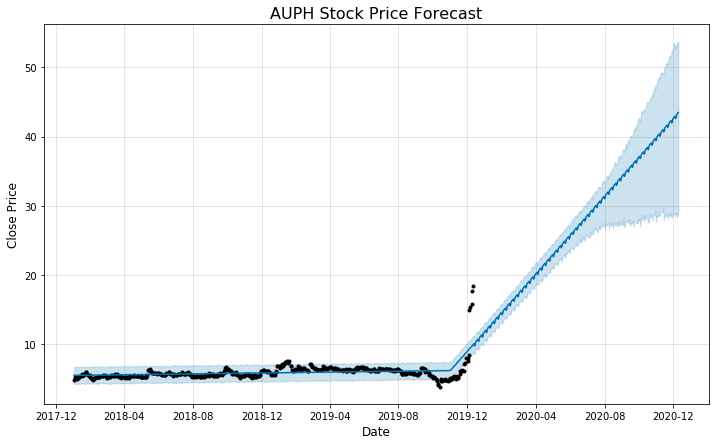

In [356]:
fig = my_model.plot(forecast)
#a = add_changepoints_to_plot(fig.gca(), my_model, forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("AUPH Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)
